In [1]:
# import dependencies and global settings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# tabulate original results
data = {'Model':['Linear Regression w/SBS', 'Elastic Net', 'Lasso', 'Random Forest', 'Gradient Boosting'],
        'Score (r^2)':[0.89, 0.89, 0.90, 0.90, 0.92],
        'MAE':[15905, 13824, 14102, 5522, 6983],
        'Number of Features':[24, 213, 213, 79, 79],
        'CPU time':['< 1s', '12s', '1min 3s', '31min 55s', '55min 14s']}

df = pd.DataFrame(data).sort_values('Score (r^2)', axis=0, ascending=False)
df

,Model,Score (r^2),MAE,Number of Features,CPU time
4,Gradient Boosting,0.92,6983,79,55min 14s
2,Lasso,0.90,14102,213,1min 3s
3,Random Forest,0.90,5522,79,36min 53s
0,Linear Regression w/SBS,0.89,15905,24,< 1s
1,Elastic Net,0.89,13824,213,12s


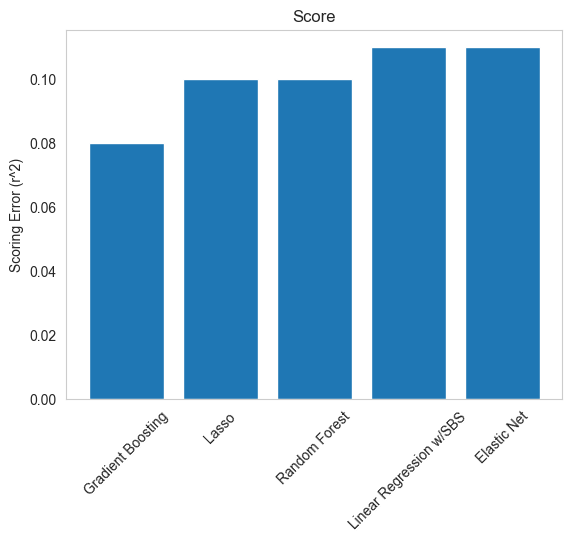

In [3]:
#bar chart ranking models by r_2 error
X = df['Model']
error = 1 - df['Score (r^2)']

plt.bar(X, error, label='Scoring Error (r^2)')
plt.xticks(rotation = 45)
plt.ylabel("Scoring Error (r^2)")
plt.title("Score")
plt.grid(False)

plt.show()

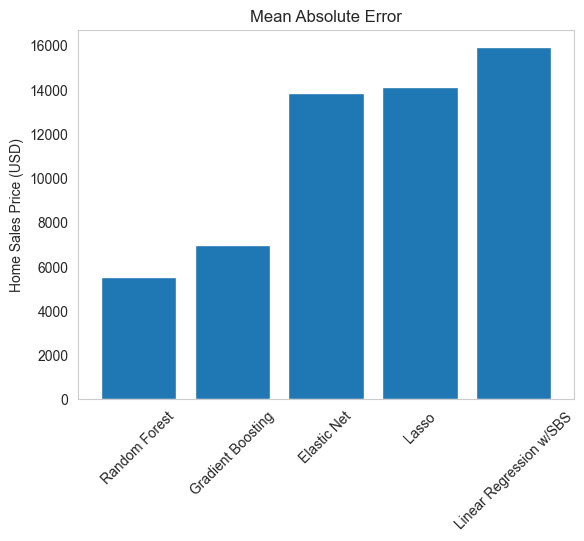

In [4]:
#bar chart ranking models by MAE
df = pd.DataFrame(data).sort_values('MAE', axis=0, ascending=True)
X = df['Model']
MAE = df['MAE']

plt.bar(X, MAE, label = 'Mean Absolute Error')
plt.xticks(rotation = 45)
plt.ylabel("Home Sales Price (USD)")
plt.title("Mean Absolute Error")
plt.grid(False)

plt.show()

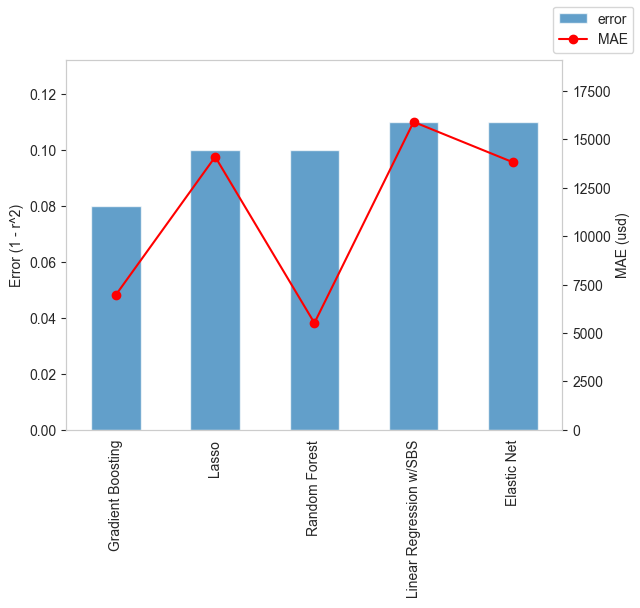

In [5]:
#bar/line chart for error and MAE values grouped by model
df = pd.DataFrame(data).sort_values('Score (r^2)', axis=0, ascending=False)
X = df['Model']
error = 1 - df['Score (r^2)']
MAE = df['MAE']

fig = plt.figure()
ax1 = error.plot(kind="bar", alpha=0.7, label='error')
ax1.set_xticklabels(X)
ax1.set_ylim(0, 1.2*error.max())
ax1.set_ylabel('Error (1 - r^2)')
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(ax1.get_xticks(), MAE, marker='o', c='red', label='MAE')#, linewidth=4)
ax2.set_ylim(0, 1.2*MAE.max())
ax2.set_ylabel('MAE (usd)')
ax2.grid(False)

fig.legend()

plt.show()

## w/ stacking model

In [6]:
# tabulate original results w/stacking model
data = {'Model':['Linear Regression w/SBS', 'Elastic Net', 'Lasso', 'Random Forest', 'Gradient Boosting', 'Stacking'],
        'Score (r^2)':[0.89, 0.89, 0.90, 0.90, 0.92, 0.93],
        'MAE':[15905, 13824, 14102, 5522, 6983, 6958],
        'Number of Features':[24, 213, 213, 79, 79, 79],
        'CPU time':['< 1s', '12s', '1min 3s', '36min 53s', '55min 14s', '2min 28s']}

df = pd.DataFrame(data).sort_values('Score (r^2)', axis=0, ascending=False).set_index('Model')
df

,Score (r^2),MAE,Number of Features,CPU time
Model,,,,
Stacking,0.93,6958,79,2min 28s
Gradient Boosting,0.92,6983,79,55min 14s
Lasso,0.90,14102,213,1min 3s
Random Forest,0.90,5522,79,36min 53s
Linear Regression w/SBS,0.89,15905,24,< 1s
Elastic Net,0.89,13824,213,12s


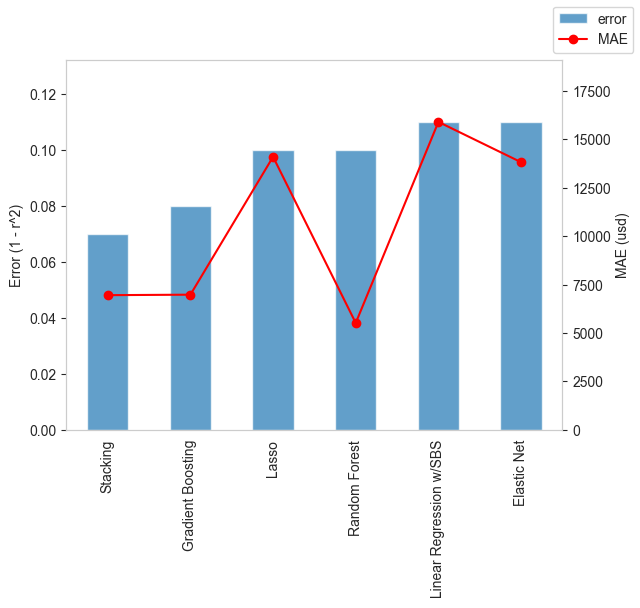

In [7]:
#bar/line chart for error and MAE values grouped by model
df = pd.DataFrame(data).sort_values('Score (r^2)', axis=0, ascending=False)
X = df['Model']
error = 1 - df['Score (r^2)']
MAE = df['MAE']

fig = plt.figure()
ax1 = error.plot(kind="bar", alpha=0.7, label='error')
ax1.set_xticklabels(X)
ax1.set_ylim(0, 1.2*error.max())
ax1.set_ylabel('Error (1 - r^2)')
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(ax1.get_xticks(), MAE, marker='o', c='red', label='MAE')#, linewidth=4)
ax2.set_ylim(0, 1.2*MAE.max())
ax2.set_ylabel('MAE (usd)')
ax2.grid(False)

fig.legend()

plt.show()

## Linear Regression w/SBS summary

In [8]:
data_sbs_summary = {'Metrics':['MAE', 'Score (r^2)', 'Number of Features', 'CPU time'],
                    'Linear Regression w/SBS':[15905, 0.89, 24, '< 1s']}

df_sbs_summary = pd.DataFrame(data_sbs_summary).set_index('Metrics')
df_sbs_summary

,Linear Regression w/SBS
Metrics,
MAE,15905
Score (r^2),0.89
Number of Features,24
CPU time,< 1s
